# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Assignment 1: MLPs

## Learning Objectives

At the end of the experiment, you will be able to

* understand what are Perceptron and Multi Layer Perceptron (MLP)
* solve XOR problem with MLP Classification 
* understand the backprop algorithm
* know gradient issues, and activation functions

### Introduction

Artificial Neural Network (ANN) is a Machine Learning model inspired by the networks of biological neurons found in our brains.

### The Perceptron

#### Biological Neurons

Biological neurons send and receive signals from the brain. The main component functions of a neuron are - Dendrite: Receives signals from other neurons; Soma: Processes the information; Axon: Transmits the output of this neuron; Synapse: Point of connection to other neurons.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width= 500 px/>
</center>

Individual biological neurons are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons.


#### Artificial Neurons

Modelled after the human brain activity, artificial neurons are digital constructs that simulate the behavior of biological neurons in some ways. The first computational model of an (artificial) neuron was proposed by Warren MuCulloch (neuroscientist) and Walter Pitts (logician) in 1943. 

As shown below, it may be divided into 2 parts. The first part, g takes an input, performs an aggregation and based on the aggregated value, the second part, f, makes a decision. Understand further through an example [Watch a Football game?] [here](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1).

<br><br>
<center>
<img src="https://miro.medium.com/max/369/1*fDHlg9iNo0LLK4czQqqO9A.png" width= 320px/>
</center>

<br><br>


The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &0&  if\ \  z < 0\\ 
    &1&  if\ \  z \ge 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &-1&  if\ \  z < 0\\ 
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class. 



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M4_AST_01_MLPs_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.extras.talentsprint.com/CDS/Datasets/Real_estate.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/adsmi/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import Perceptron
iris = datasets.load_iris()
# petal length, petal width
X = iris.data[:, (2, 3)] 
# Iris setosa?
y = (iris.target == 0).astype(np.int) 

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

Notice that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold.

One of the weaknesses of Perceptrons is that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem; shown in the left side of the figure given below.

But it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a **Multilayer Perceptron (MLP)**. 

An MLP can solve the XOR problem, as we can verify by computing the output of the MLP represented on the right side of the figure given below: 

* with inputs (0, 0) or (1, 1), the network outputs 0, and 
* with inputs (0, 1) or (1, 0) it outputs 1. 

All connections have a weight equal to 1, except the four connections where the weight is shown.

<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1006.png" width= 500px/>
</center>

$\hspace{8cm} \text {XOR problem}\hspace{5 cm} \text {MLP}$
<br><br>

### The Multilayer Perceptron and Backpropagation

An MLP is composed of 

* one (passthrough) **input layer**, 
* one or more layers of TLUs, called **hidden layers**, and 
* one final layer of TLUs called the **output layer** as shown in the figure below. 

The layers close to the input layer are usually called the lower layers, an the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a **bias neuron** and is fully connected to the next layer.

<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1007.png" width= 500px/>
</center>

When an ANN contains a deep stack of hidden layers, it is called a **deep neural network (DNN)**. The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations.

MLPs are trained using **backpropagation training algorithm**.

In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. 

In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Let’s run through this algorithm in detail:

* It handles one mini-batch at a time (say, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an **epoch**.

* Each mini-batch is passed to the network’s **input layer**, which sends it to the first **hidden layer**. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the **output layer**. This is the **forward pass**: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

* Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

* Then it computes how much each output connection contributed to the error.
This is done analytically by applying the chain rule, which makes this step fast and precise.

* The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule, working backward
until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.

* Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

Let's summarize this algorithm again: for each training instance, the backpropagation algorithm first makes a prediction (**forward pass**) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (**reverse pass**), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorithm to work properly, the step function was replaced with activation function.

### Activation Functions

Replacing the step function with activation function was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the activation function has a well-defined nonzero derivative, allowing Gradient Descent to make some progress at every step.

Some of the activation functions are shown below:

* **Logistic (sigmoid) function:**

$$σ(z) = \frac{1}{1 + exp(–z)}$$

It is S-shaped function, exists between $0$ to $1$. Therefore, it is especially used for models where we have to predict the probability as an output. The function is differentiable.
That means, we can find the slope of the sigmoid curve at any two points.

* **Hyperbolic tangent function:** 

$$tanh(z) = 2σ(2z) – 1 = \frac{2}{1 + exp(–2z)} - 1$$

Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from $–1$ to $1$. That range tends to make each layer’s output more or less centered around $0$ at the beginning of training, which often helps speed up convergence.

* **Rectified Linear Unit function:**

$$ReLU(z) = max(0, z)$$

The ReLU function is continuous but unfortunately not differentiable at $z = 0$
(the slope changes abruptly, which can make Gradient Descent bounce around),
and its derivative is $0$ for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in
the figure below. 
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1008.png" width=700px/>
</center>
<br><br>

**Why do we need activation functions?** 

If we chain several linear transformations, all we get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1.$ 

So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

Training a DNN is not an easy task. Let's see what difficulties we may encouter during that process.

### Gradient Issues

Some of the problems we could run into while training a deep DNN are:

* **vanishing gradients** when the gradients grow smaller and smaller,

* **exploding gradients** when the gradients grow larger and larger,

when flowing backward through the DNN during training. Both of these problems make lower layers very hard to train.

Once the backprop algorithm has computed the gradient of the cost function with regard to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.

Unfortunately, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower layers’ connection weights virtually unchanged, and training never converges to a good solution. We call this the **vanishing gradients** problem. In some cases, the opposite can happen: the gradients can grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges. This is the **exploding gradients** problem, which surfaces in recurrent neural networks. More generally, deep neural networks suffer from unstable gradients; different layers may learn at widely different speeds.

In 2010 it was discovered the problem was with the popular logistic sigmoid activation function and the weight initialization technique (i.e., a normal distribution with a mean of $0$ and a standard deviation of $1$). 

Looking at the logistic activation function shown in the figure below, we can see that when inputs become large (negative or positive), the function saturates at $0$ or $1$, with a derivative extremely close to $0$. Thus, when backpropagation comes in it has virtually no gradient to propagate back through the network; and what little gradient exists keeps getting diluted as backpropagation progresses down through the top layers, so there is nothing left for the lower layers.
<br><br>
<center>
<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/gradients-in-sigmoid-activation-functions.jpg" width= 450px/>
</center>


In their paper, Glorot and Bengio proposed: the connection weights of each layer must be initialized randomly to significantly alleviate the unstable gradients problem. This initialization strategy is called **Xavier initialization** or **Glorot initialization**, after the paper’s first author.

Glorot initialization (when using the logistic activation function):

Normal distribution with mean 0 and variance $σ^2 = \frac{1}{fan_{avg}}$

Or a uniform distribution between $−r$ and $+r$, with $r = \sqrt{\frac{3}{fan_{avg}}}$

where $fan_{avg} = \frac{fan_{in} + fan_{out}}{2}$,

$fan_{in}$ and $fan_{out}$ are number of inputs and neurons of the layer.

Similar strategies for different activation functions differ only by the scale of the variance and whether they use $fan_{avg}$ or $fan_{in}$, as shown in the table below (for the uniform distribution, just compute $r = \sqrt{3σ^2}$).

The initialization strategy for the ReLU activation function and its variants, is sometimes called **He initialization**.

| Initialization | Activation functions          | $\sigma ^2$ Normal |
|:---------------|:------------------------------|:-------------------|
| Glorot         | None, tanh, logistic, softmax | $1$/$fan_{avg}$    |
| He             | ReLU and variants             | $2$/$fan_{avg}$    |

By default, Keras uses Glorot initialization with a uniform distribution. When creating a layer, we can change this to He initialization by setting `kernel_initializer="he_uniform"` or `kernel_initializer="he_normal"`.


### Regression MLPs

MLPs can be used for regression tasks. If we want to predict a single value, then we just need a single output neuron: its output is the predicted value. 
For multivariate regression (i.e., to predict multiple values at once), we need one output neuron per output dimension. 

In general, when building an MLP for regression, we do not want to use any activation function for the output neurons, so they are free to output any range of values. 

If we want to guarantee that the output  

* will always be **positive**, then we can use the ReLU activation function in the output layer. 

* will fall **within a given range** of values, then we can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if we have a lot of outliers in the training set, we may prefer to use the mean absolute error instead. Alternatively, we can use the Huber loss, which is a combination of both.

### MLP Classifiers

MLPs can also be used for classification tasks. They can perform (i) Binary Classification (ii) Multilabel Binary Classification and (iii) Multiclass classification

* **Binary classification:** Used when there are only two distinct classes and the data we want to classify belongs exclusively to one of those classes, e.g. classifying if a review sentiment is positive or negative.

* **Multilabel binary classification:** Used when there are two or more classes and the data we want to classify belongs to none of the classes or all of them at the same time, e.g. classifying which traffic signs are shown in an image.

  Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels

* **Multiclass classification:** Used when there are three or more classes and the data we want to classify belongs exclusively to one of those classes, e.g.  out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), we need to have one output neuron per class, and we should use the **softmax activation function** for the whole output layer as shown in the figure below. The softmax function will ensure that all the estimated probabilities are between $0$ and $1$ and that they add up to $1$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1009.png" width=500px/>
</center>

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (also called the log loss) is generally a good choice.

### Building an Image Classifier Using the Sequential API

Here we consider Fashion MNIST dataset. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. 

In [ ]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0:

In [ ]:
# Validation set and scaling
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image represents the
handwritten digit 5. For Fashion MNIST, however, we need the list of class
names to know what we are dealing with:

In [ ]:
# List of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# For example, the first image in the training set represents a coat:
class_names[y_train[0]]

'Coat'

**Creating the model using the Sequential API**

Here is a classification MLP with two hidden layers:

In [ ]:
# Create model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through the above code line by line:

* The first line creates a Sequential model. This is the simplest kind of Keras
model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, we should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, we could add a `keras.layers.InputLayer` as the first layer, setting input_shape=[28,28].

* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes $h_{W, b}(X) = ϕ( XW + b)$.

* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU
activation function.

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

Instead of adding the layers one by one we can pass a list of layers when creating the Sequential model:


In [ ]:
# Create model
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
                                 ])

The model’s `summary()` method displays all the model’s layers, including each layer’s name , its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

In [ ]:
# Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

After a model is created, we must call its `compile()` method to specify the loss function and the optimizer to use.

In [ ]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In the above code cell, 

* first, we use the **"sparse_categorical_crossentropy"** loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

* Regarding the optimizer, **"sgd"** means that we will train the model using simple Stochastic Gradient Descent. 

* Finally, since this is a classifier, it’s useful to measure its **"accuracy"** during training and evaluation.

**Training and evaluating the model**


In [ ]:
# Training model on Training set
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7354 - accuracy: 0.7575 - val_loss: 0.5278 - val_accuracy: 0.8088
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4884 - accuracy: 0.8288 - val_loss: 0.4500 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8446 - val_loss: 0.4051 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8525 - val_loss: 0.3940 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3941 - accuracy: 0.8623 - val_loss: 0.3735 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8658 - val_loss: 0.3760 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3638 - accuracy: 0.8708 - val_loss: 0.3975 - val_accuracy:

The `fit()` method returns a History object containing the training parameters
(`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

Let's plot the learning curves:

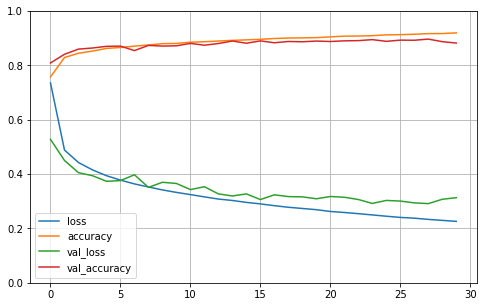

In [ ]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1) 
plt.show()

We can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease. Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting.

Once we are satisfied with the model’s validation accuracy, we should evaluate it on the test set to estimate the generalization error before we deploy the model to production. We can easily do this using the `evaluate()` method:

In [ ]:
# Model performance on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 56.1707 - accuracy: 0.8706


[56.17066192626953, 0.8705999851226807]

**Using the model to make predictions**

We can use the model’s `predict()` method to make predictions on new instances.

In [ ]:
# Predict class probabilities for first three instances of X_test
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Predict class labels for first three instances of X_test
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predicted labels: \n", y_pred)

print(np.array(class_names)[y_pred])

Predicted labels: 
 [9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


Actual labels:  [9 2 1]


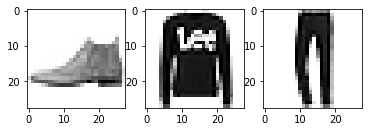

In [ ]:
# Actual labels
y_new = y_test[:3]
print("Actual labels: ", y_new)

fig, ax = plt.subplots(1,3)
for axi, i in zip(ax.ravel(), np.arange(len(X_new))):
    axi.imshow(X_new[i], cmap='Greys')

From the above results, we can see that the classifier actually classified all three images correctly.

Let's see one example with XOR dataset.

**Exercise 1:** Generate the XOR dataset and perform classification using the MLPClassifier.

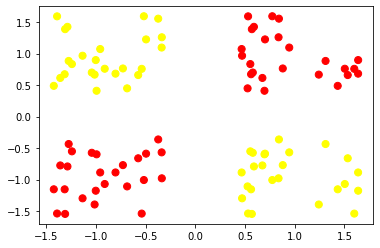

In [ ]:
# generate 25 random numbers for 4 quadrants represents XOR
x1 = np.random.uniform(1,3,25)                 
x2 = np.random.uniform(4,6,25)                 
y1 = np.random.uniform(1,3,25)                 
y2 = np.random.uniform(4,6,25)                 

# features
X_1 = np.vstack([np.append(x1,x2), np.append(y1,y2)]).T  
X_2 = np.vstack([np.append(x1,x2), np.append(y2,y1)]).T  
X = np.vstack([X_1, X_2])   

# label 0 and 1
y_1 = [0 for i in range(len(X_1))]                              
y_2 = [1 for i in range(len(X_2))]                                 
y = np.append(y_1, y_2)  

# stack features and labels
data = np.hstack([X,y.reshape(-1,1)])

# shuffle the dataset
np.random.shuffle(data)   
# Split the data                     
X, y = data[:,:2], data[:,2]                   
X = StandardScaler().fit_transform(X) 

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [ ]:
per_clf = Perceptron()
per_clf.fit(X, y)
pred = per_clf.predict(X)
accuracy_score(y, pred)

0.5

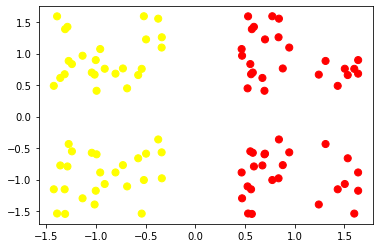

In [ ]:
# Visualize prediction using single Perceptron 
plt.scatter(X[:, 0], X[:, 1], c=pred, s=50, cmap='autumn')
plt.show()

From the above results we can see that single perceptron is unable to classify two classses. Let's use multilayer perceptron with single hidden layer having 4 neurons:

In [ ]:
model = MLPClassifier(activation='relu', 
                      max_iter=10000, 
                      hidden_layer_sizes=(4)
                      )
model.fit(X, y)
y_pred = model.predict(X)
accuracy_score(y, y_pred)

1.0

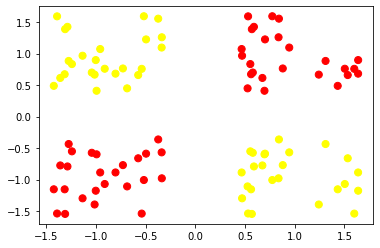

In [ ]:
# Visualize prediction using multilayer perceptron
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='autumn')
plt.show()

From the above results, we can see that MLP classify the two classes almost accurately.

### Graded Assignment

### Please answer the questions below to complete the experiment:




In [ ]:
#@title  In a simple MLP model with 10 neurons in the input layer, 5 neurons in the hidden layer and 1 neuron in the output layer. What is the size of the weight matrices between "hidden layer and output layer" and "input layer and hidden layer"? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "[1 X 10] , [5 X 1]", "[5 X 1] , [1 X 10]", "[5 X 1] , [10 X 5]"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")